# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
tf.__version__

'2.2.0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Part 1 - Data Preprocessing

### Importing the dataset

In [4]:
df = pd.read_csv("/content/drive/My Drive/ANN/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
#checking for null values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [16]:
x = df.iloc[:,3:-1].values
y = df["Exited"].values

print(x), print(y), x.shape

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


(None, None, (10000, 10))

### Encoding categorical data

Label Encoding the "Gender" column

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x[:,2] = encoder.fit_transform(x[:,2])

In [18]:
print(x), x.shape

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


(None, (10000, 10))

One Hot Encoding the "Geography" column

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
print(x), x.shape

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


(None, (10000, 12))

### Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

### Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [30]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [31]:
ann.add(tf.keras.layers.Dense(units = 10, activation="relu"))

### Adding the second hidden layer

In [32]:
ann.add(tf.keras.layers.Dense(units = 10, activation="relu"))

### Adding the output layer

In [33]:
ann.add(tf.keras.layers.Dense(units = 1, activation="sigmoid"))

## Part 3 - Training the ANN

### Compiling the ANN

In [34]:
ann.compile(optimizer="adam",loss = "binary_crossentropy", metrics = ["accuracy"])

### Training the ANN on the Training set

In [35]:
es = tf.keras.callbacks.EarlyStopping(monitor= "val_loss", mode = "min",verbose =1)

Using early stopping for avoiding overfitting of model

In [36]:
train = ann.fit(x = x_train, y = y_train, batch_size=32, validation_data=(x_test, y_test),epochs=50, callbacks=[es])

Epoch 1/50
250/250 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.7149 - val_loss: 0.4706 - val_accuracy: 0.8005
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.8035 - val_loss: 0.4337 - val_accuracy: 0.8135
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8123 - val_loss: 0.4226 - val_accuracy: 0.8195
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.8164 - val_loss: 0.4174 - val_accuracy: 0.8215
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.8210 - val_loss: 0.4134 - val_accuracy: 0.8280
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8230 - val_loss: 0.4096 - val_accuracy: 0.8280
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8275 - val_loss: 0.4072 - val_accuracy: 0.8305
Epoch 

Train: 0.861, Test: 0.860


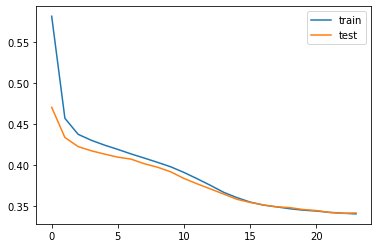

In [51]:
# evaluate the model
_, train_acc = ann.evaluate(x_train, y_train, verbose=0)
_, test_acc = ann.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(train.history['loss'], label='train')
plt.plot(train.history['val_loss'], label='test')
plt.legend()
plt.show()

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

**Solution**

In [53]:
print(ann.predict( sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]]) )>0.5 )

[[False]]


From result we can see the worker won't leave the bank

Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [54]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1536   49]
 [ 231  184]]


0.86